## Implementing an exponential filter model to estimate soil water content in the entire root-zone

**Name**: Pedro Rossini <br/>
**Project area**: Agronomy, Irrigation crops

## Objective
Create a python function to estimate daily soil water content of the entire root-zone (0 to 80 cm) from surface observations (0 to 5 cm) using an exponential filter equation.

## Sketch
 
<img src="Soil_2.JPG" alt="sketch_image" width="500"/>

Figure 1. Sketch summary the workflow proposed for this project.

## Rationale and methodology

The exponential filter is a known analytical method, that divide the soil profile in two layers: surface and sub-surface. The objetive is  predict the sub-surface soil moisture from observed measurement to the surface layer (Wagner et al., 1999).  

Albergel et. al., (2008) to sumplify the calculations present a recursive equation:


  $$SWI_{2(t)} = SWI_{2(t-1)} + K_t [\text{vwc}_{(t)} - SWI_{2(t-1)}]$$
  
Where $SWI_2$ represent the soil water index of the second layer, $\text vwc_{(t)}$ represents the measured soil water content at the surface layer (0 to 5 cm) and $K$ is the gain exponential filter tha get values between 0 and 1 

  
  $$K_{(t)} = \frac{ K_{(t-1)}} { K_{(t-1)} + \exp\frac{(t-t-1)} {T}} $$


Daily soil moisture observations at 5 cm depth from Kansas Mesonet will be use as a main input of the model $\text vwc_{(t)}$. On the other hand, daily soil moisture observations at 10, 20, and 50 cm depth will be used to test the outputs, calibrate and validate the model predictions.


### Import the modules

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Create a function

In [63]:

def SWIfn (vwc5,surface_max_storage,sub_surface_vwc_sensors,k):

    profile_SWC = [];
    SWI = [(vwc5[0]/surface_max_storage)]

    for i in range(1,len(vwc5)):
        new_SWI = SWI[i-1] + k *((vwc5[i]/surface_max_storage) - SWI[i-1])
        SWI.append(new_SWI)
        sub_surf_storage = SWI[i] * np.max(sub_surface_vwc_sensors)- np.min(sub_surface_vwc_sensors)+ np.min(sub_surface_vwc_sensors)
        profile_SWC_est = (vwc5[i] * 50) + (sub_surf_storage * 450)
        profile_SWC.append(profile_SWC_est)  
    return profile_SWC



### Inputs (example: data from Mesonet station: Gypsum 2018)

In [64]:
# Defining variables
dirname = '/Users/prossini/Desktop/coding/Project_SWI/'
filname = 'meso_data.csv'
mesonet_data = pd.read_csv(dirname + filname)

vwc5 = mesonet_data.VWC5CM;
surface_max_storage = 0.39
sub_surf_max_storage = 0.395

### Execute the function and store the output in a variable

In [65]:
profile_SWC = SWIfn(vwc5,surface_max_storage,sub_surf_max_storage,1)

### Ploting the results

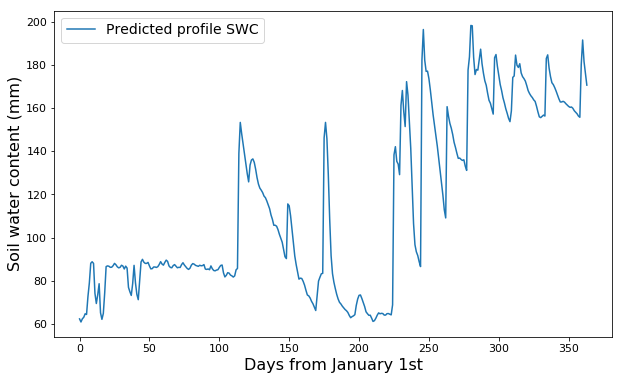

In [66]:
plt.figure(figsize=(10,6))
plt.plot(profile_SWC)
plt.legend(['Predicted profile SWC'],fontsize=14)
plt.xlabel('Days from January 1st', fontsize=16)
plt.ylabel('Soil water content (mm)',fontsize=16)
plt.rcParams['ytick.labelsize'] = 11.0
plt.rcParams['xtick.labelsize'] = 11.0
plt.show()

### Observed data vs estimated

In [67]:
# Calculate SWC in each layer expressed in milimeters

SWC5 = mesonet_data.VWC5CM * 50
SWC10 = (mesonet_data.VWC5CM  + mesonet_data.VWC10CM)/2 * 50
SWC20 = (mesonet_data.VWC10CM + mesonet_data.VWC20CM)/2 * 100
SWC50 = (mesonet_data.VWC20CM + mesonet_data.VWC50CM)/2 * 300

profile_SWC_sensors = SWC5 + SWC10 + SWC20 + SWC50
sub_surface_SWC_sensors = SWC10 + SWC20 + SWC50;

### Plotting Observed data vs estimated

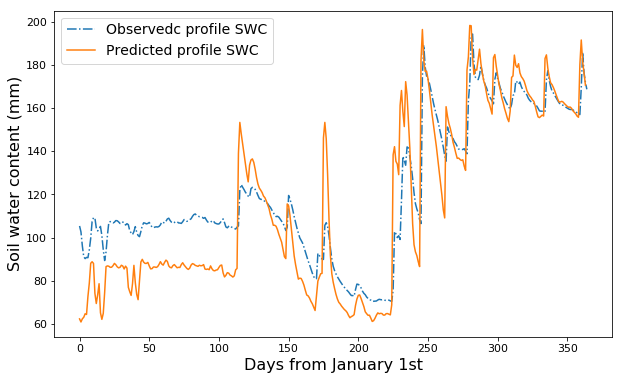

In [68]:
plt.figure(figsize=(10,6))
plt.plot(profile_SWC_sensors,'-.')
plt.plot(profile_SWC)
plt.legend(['Observedc profile SWC','Predicted profile SWC'],fontsize=14)
plt.xlabel('Days from January 1st', fontsize=16)
plt.ylabel('Soil water content (mm)',fontsize=16)
plt.rcParams['ytick.labelsize'] = 11.0
plt.rcParams['xtick.labelsize'] = 11.0
plt.show()

### Future steps

- Improve setting the initial parameters
- Optimize K and T parameter
- Test new mesonet station, different weather regions and soil types 
- Validate and correlate the function 